In [135]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [136]:
#Muestra los primeros datos del dataset
raw_data = pd.read_csv("../raw/breast-cancer.csv")
raw_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [137]:
#Sirve para ver los posible valores de una columna
#print(raw_data['Test Results'].unique())

In [138]:
#Se obtienen las dimensiones del dataset
raw_data.shape

(569, 32)

In [139]:
#Se obtienen las dimensiones del dataset eliminando los valores nulos
raw_data.dropna().shape

(569, 32)

In [140]:
#Se obtienen las columnas del dataset
raw_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [141]:
#Tipos de datos
raw_data.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [142]:
#Se filtran las columnas que se van a utilizar, en este caso se utilizan las columnas que puedan tener un impacto en el resultado
filter_data_values = raw_data[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [143]:
#Se cuentan los valores que puede tomar la columna 'diagnosis'
filter_data_values['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

<Axes: >

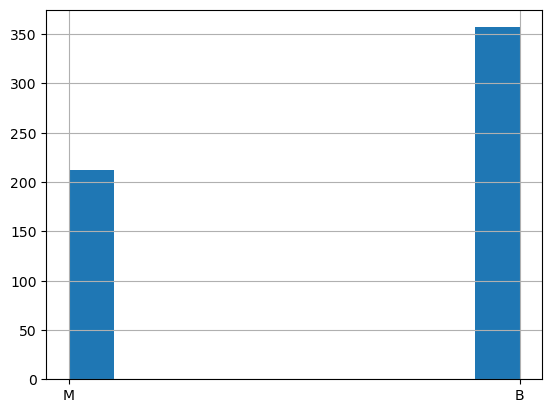

In [144]:
filter_data_values['diagnosis'].hist()

In [145]:
#Se divide el set de datos entre los datos a usar y la respuesta
response = filter_data_values['diagnosis']
data = filter_data_values.drop(columns=['diagnosis'])

In [146]:
#Se separan los datos en datos numericos y datos categoricos
#data_num = data.select_dtypes(exclude='object')
#data_object = data.select_dtypes(include='object')

#Se instancia el objeto a utilizar para la codificacion de los datos categoricos y este se transforma a un dataframe
#Pandas no soporta los datos sparse, por lo que se utiliza la opcion de sparse_output=False
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")

In [147]:
#Se codifican los datos categoricos por cada columna
#for col_name in data_object.columns:
    #encoded_array = encoder.fit_transform(data_object[[col_name]])
    #data_object = pd.concat([data_object, encoded_array], axis=1).drop(col_name, axis=1)

In [148]:
#Se unen los datos numericos y categoricos
#data= pd.concat([data_num, data_object], axis=1)
data= pd.concat([data_num], axis=1)

In [149]:
#Se dividen los datos en datos de entrenamiento y test 90% y 10% respectivamente
X_train, X_test, y_train, y_test = train_test_split(data, response, test_size=0.1, random_state=10)
#Se dividen los datos de entrenamiento en datos de entrenamiento y validacion 80% y 20% respectivamente
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

In [150]:
#Se guardan los datos en archivos csv
X_train.to_csv("../process_dataset/train_data.csv", index=False)
X_val.to_csv("../process_dataset/val_data.csv", index=False)
X_test.to_csv("../process_dataset/test_data.csv", index=False)

In [151]:
#Se guardan los datos de respuesta en archivos csv
with open("../process_dataset/y_train.npy", 'wb') as doc_export:
    np.save(doc_export, y_train)
with open("../process_dataset/y_val.npy", 'wb') as doc_export:
    np.save(doc_export, y_val)
with open("../process_dataset/y_test.npy", 'wb') as doc_export:
    np.save(doc_export, y_test)

In [152]:
df_counts = pd.DataFrame()
df_counts["y_values"] = y_train
#Se verifican los datos de respuesta
df_counts["y_values"].value_counts()

y_values
B    266
M    143
Name: count, dtype: int64